# Lab 6: Fraud Detection in Transaction Data using KNN Algorithm

### INTRODUCTION:

K-nearest neighbors (KNN) is a type of supervised learning algorithm used for both regression and classification. KNN tries to predict the correct class for the test data by calculating the distance between the test data and all the training points. Then select the K number of points which is closet to the test data. The KNN algorithm calculates the probability of the test data belonging to the classes of ‘K’ training data and class holds the highest probability will be selected. In the case of regression, the value is the mean of the ‘K’ selected training points.

### DATA DESCRIPTION:

Time-Number of seconds elapsed between this transaction and the first transaction in the dataset.
(v1-v10) result of a PCA Dimensionality reduction to protect user identities and sensitive features
Amount-Transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### OBJECTIVE:

#The objective is to predict Fraud Detection in Transaction Data using KNN Algorithm

### IMPORTING LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### IMPORTING THE DATASET

In [ ]:
data = pd.read_excel("C:/Users/HP/Downloads/creditcard1.csv.xlsx")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,790,-1.144134,1.184349,2.183530,2.417732,-1.352731,1.698888,0.340731,0.490311,-0.456615,1.429677,197.16,1
1045,791,1.059212,0.031148,0.246141,1.232533,0.057849,0.357054,0.040610,0.121939,-0.003625,0.013792,52.93,1
1046,791,1.078354,0.483847,0.493123,2.472391,0.096426,-0.075871,0.217795,-0.075208,-0.901616,0.624817,44.91,1
1047,792,-2.496329,1.157444,3.770236,-0.230246,0.007065,0.506341,1.629152,-2.267294,4.304904,4.079995,3.37,1


## Exploratory Data Analysis


In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Amount,Class
count,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000
mean,390.251668,-0.185289,0.223388,0.861822,0.238819,-0.033030,0.145555,0.096446,-0.074300,0.007559,0.047056,67.323804,0.023832
std,233.951004,1.334072,1.152379,1.024321,1.264644,1.086742,1.234529,0.834257,0.900857,0.905135,0.963043,190.252730,0.152599
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.980624,-3.563578,0.000000,0.000000
25%,184.000000,-0.937904,-0.191528,0.287224,-0.492199,-0.557398,-0.643710,-0.330959,-0.182281,-0.486183,-0.373814,5.260000,0.000000
50%,388.000000,-0.365532,0.284169,0.863585,0.348488,-0.148004,-0.129603,0.090389,0.029163,-0.068274,-0.086777,16.000000,0.000000
75%,599.000000,1.130922,0.866354,1.514665,1.063768,0.430336,0.476610,0.559119,0.250424,0.447697,0.295110,54.990000,0.000000
max,792.000000,1.685314,5.267376,4.017561,4.861129,7.672544,5.122103,4.808426,3.877662,5.459274,8.821756,3828.040000,1.000000


In [ ]:
data['Class'].unique()

array([0, 1], dtype=int64)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Amount,Class
Time,1.000000,0.002010,0.017698,-0.002353,-0.092409,-0.046746,-0.082586,-0.047976,-0.044391,0.036636,-0.006451,-0.027137,0.244150
V1,0.002010,1.000000,-0.130860,-0.267842,0.171394,-0.162904,-0.032516,-0.210058,0.121984,-0.169634,-0.164484,-0.225671,-0.078106
V2,0.017698,-0.130860,1.000000,0.000203,0.046122,0.101673,-0.090221,0.206326,-0.111974,0.025395,0.214392,-0.573371,0.002763
V3,-0.002353,-0.267842,0.000203,1.000000,0.057352,-0.101501,-0.135105,0.034615,-0.097454,0.080760,0.104938,-0.215472,-0.024566
V4,-0.092409,0.171394,0.046122,0.057352,1.000000,-0.070259,0.048165,-0.003093,0.119961,-0.105460,0.028256,0.072229,-0.035064
V5,-0.046746,-0.162904,0.101673,-0.101501,-0.070259,1.000000,0.251588,0.056810,0.005782,0.028638,0.005951,-0.324460,-0.000107
V6,-0.082586,-0.032516,-0.090221,-0.135105,0.048165,0.251588,1.000000,-0.085696,0.101810,0.026944,0.033109,0.230620,0.015472
V7,-0.047976,-0.210058,0.206326,0.034615,-0.003093,0.056810,-0.085696,1.000000,-0.101808,0.032189,0.136268,0.313041,-0.000727
V8,-0.044391,0.121984,-0.111974,-0.097454,0.119961,0.005782,0.101810,-0.101808,1.000000,-0.161158,-0.195564,-0.042612,-0.079217
V9,0.036636,-0.169634,0.025395,0.080760,-0.105460,0.028638,0.026944,0.032189,-0.161158,1.000000,0.164856,-0.014021,0.060554


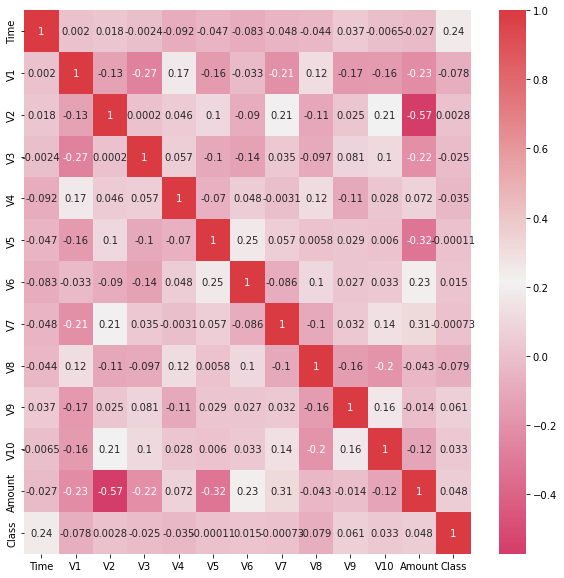

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap=sns.diverging_palette(000,11,as_cmap=True),annot=True)
data.corr()

In [ ]:
#Declaring x and y variable.
y= data['Class'].copy()
X= data.drop('Class',axis=1)

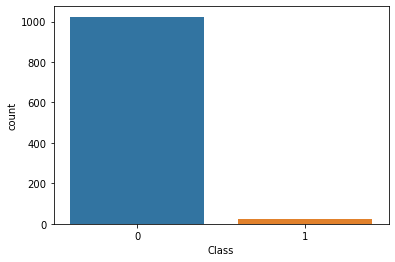

In [ ]:
import seaborn as sb
sb.countplot(x='Class',data=data)
plt.show()

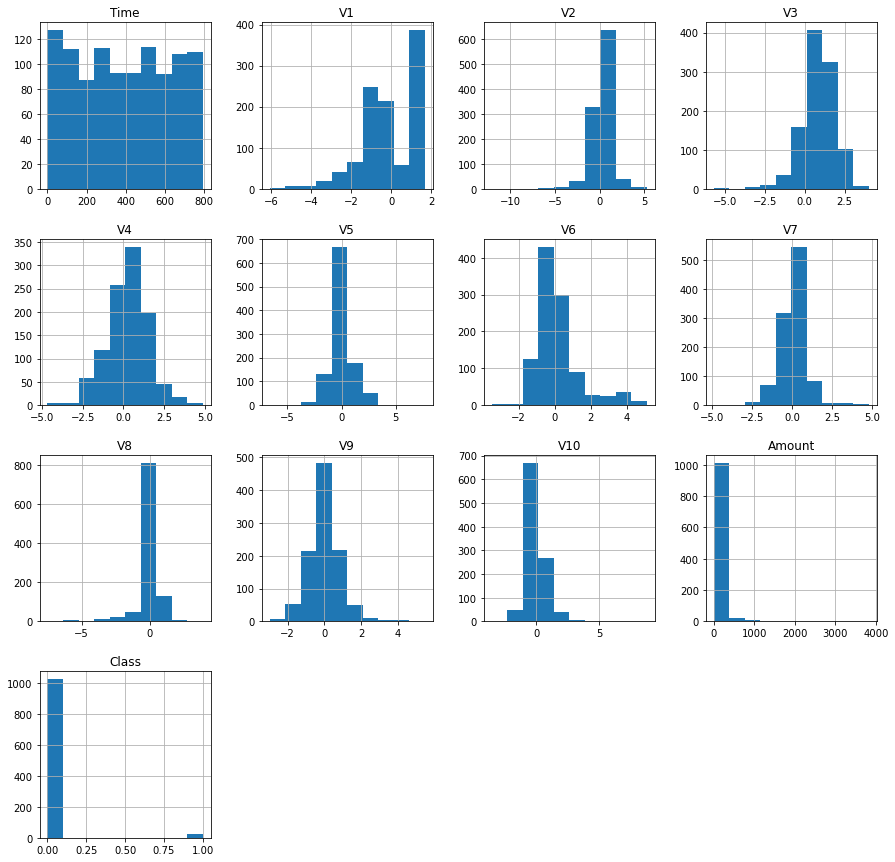

In [ ]:
data.hist(figsize = (15,15))
plt.show()

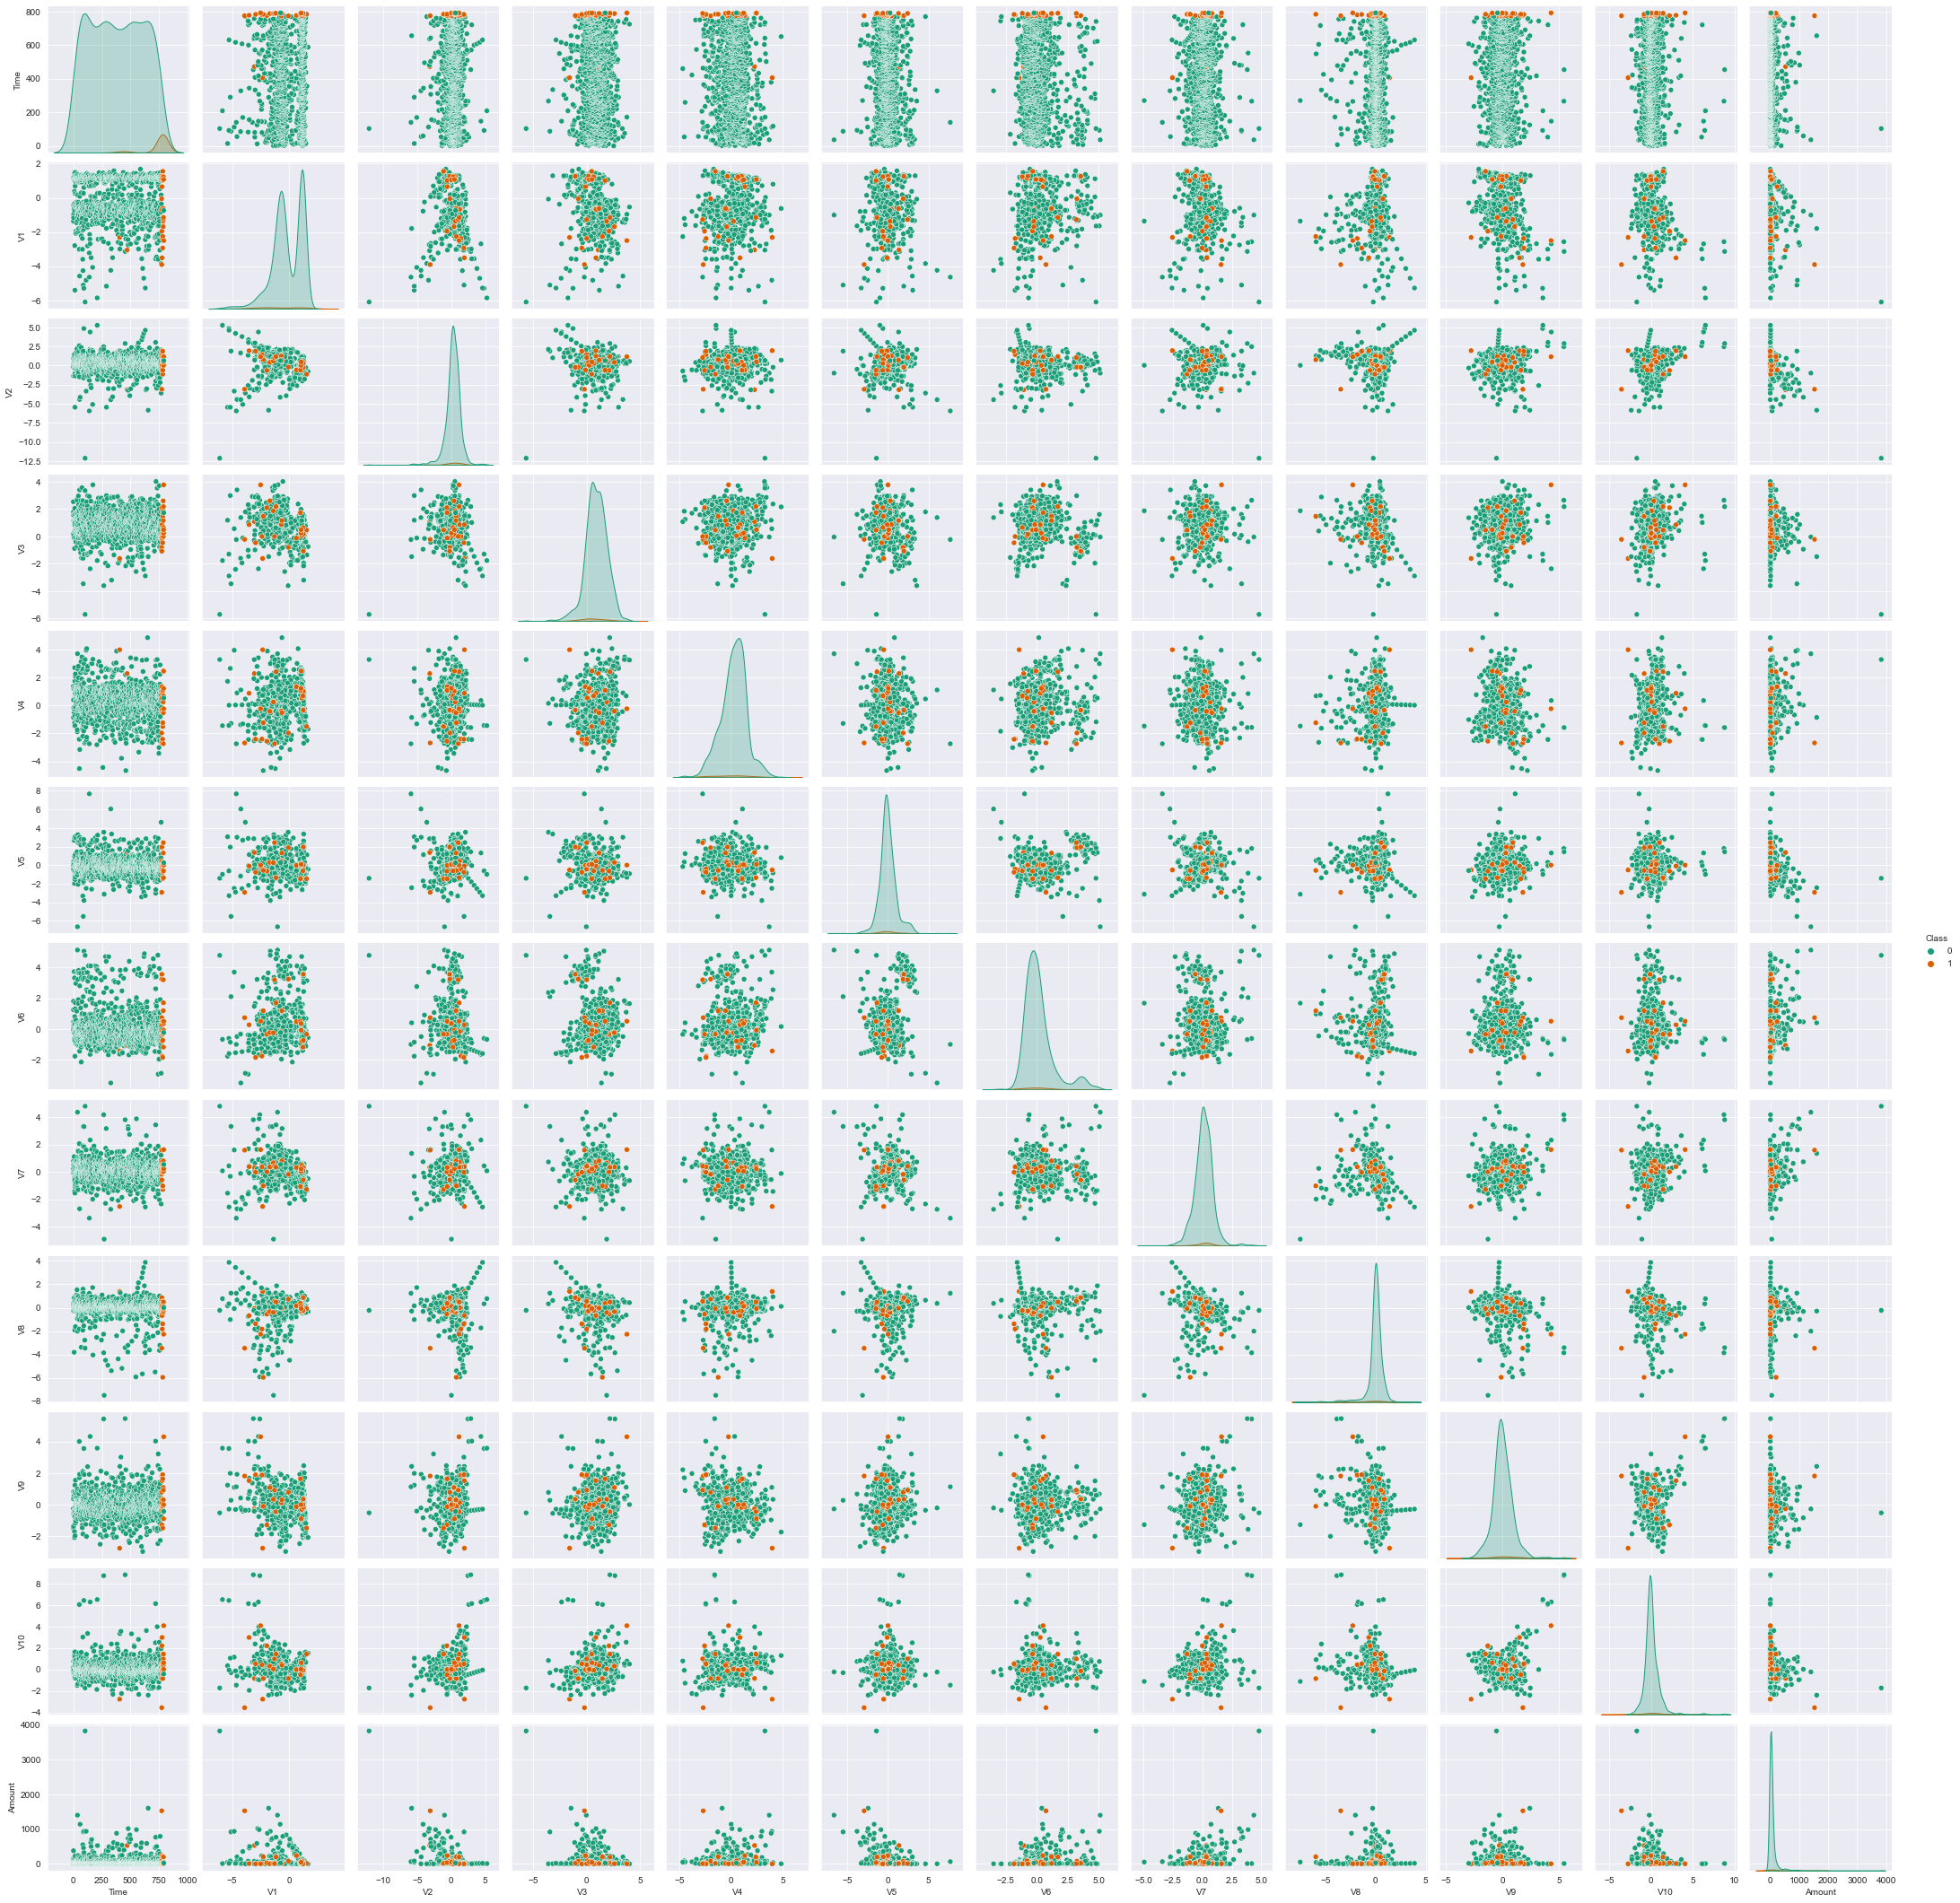

In [ ]:
sns.set_style('darkgrid')                                   # setting darkgrid background
ax = sns.pairplot(data, hue="Class",palette='Dark2')       # plotting pairplot for the dataset wrt label
plt.show()

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
count_sub1 = len(data[data['Class']==0])
count_sub2 = len(data[data['Class']==1])

pct_of_sub1 = count_sub1/(count_sub1+count_sub2)
print("percentage of subscription", pct_of_sub1*100)

pct_of_sub2 = count_sub2/(count_sub1+count_sub2)
print("percentage of subscription", pct_of_sub2*100)

percentage of subscription 97.61677788369876
percentage of subscription 2.3832221163012393


In [ ]:
#Interpretation:
#Here we can see that there is imbalance in our observation .
#In oversampling we can go for particular technique like SMOTE(synthetic minority sampling technique)

### Synthentic Minority Oversampling Technique (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Class'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))

print("Number of subscription",len(os_data_y[os_data_y['Class']==0]))
print("Number of subscription",len(os_data_y[os_data_y['Class']==1]))

print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Class']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Class']==1])/len(os_data_X))


length of oversampled data is  1428
Number of subscription 714
Number of subscription 714
Proportion of subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

### Prediction and calculating the accuracy measures¶

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm


0.9841269841269841

In [ ]:
ac = accuracy_score(y_test, y_pred)
ac

0.9841269841269841

In [ ]:
#Classification Table
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       310
           1       0.00      0.00      0.00         5

    accuracy                           0.98       315
   macro avg       0.49      0.50      0.50       315
weighted avg       0.97      0.98      0.98       315



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Interpretation:
The accuracy measure obtained 0.98 which implies the model is a good model.

Out of all the positive predictions:-
98% can be accurately predicted that the Fraud Detected in Transaction Data is Yes

Out of all the actual positives:-
47% of the predictions are accurate that the Fraud Detected in Transaction Data is Yes
